In [1]:
import csv
import numpy as np
import math as ma
import pandas as pd
import plotly.express as px

import plotly.graph_objs as go
import plotly.figure_factory as ff
import chart_studio

from statsmodels.graphics.gofplots import qqplot

from scipy import stats
import matplotlib.pyplot as plt

In [2]:
main_df = pd.read_csv(r'Data/vg_complete_df.csv')

In [3]:
vg_df = main_df.copy()

In [4]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4440 non-null   object 
 1   console           4440 non-null   object 
 2   genre_x           4440 non-null   object 
 3   publisher         4440 non-null   object 
 4   developer_x       4440 non-null   object 
 5   critic_score      4440 non-null   float64
 6   total_sales       4440 non-null   float64
 7   release_date_x    4440 non-null   object 
 8   NA_Sales          4440 non-null   float64
 9   EU_Sales          4440 non-null   float64
 10  JP_Sales          4440 non-null   float64
 11  Other_Sales       4440 non-null   float64
 12  Global_Sales      4440 non-null   float64
 13  Critic_Count      4404 non-null   float64
 14  User_Count        4440 non-null   float64
 15  Rating            4422 non-null   object 
 16  positive_critics  512 non-null    float64


Removing some outliers here, specifically, date range and Wii sports (which was sold with the console).

In [5]:
vg_df = vg_df[(vg_df['release_date_x'] > '1999-01-01')]
vg_df = vg_df[(vg_df['release_date_x'] < '2017-01-01')]
vg_df = vg_df[(vg_df['title'] == "Wii Sports")]

Looking at the unique companies

In [17]:
vg_df['company'].unique()

array([], dtype=object)

Starting to do some simple aggregation here.

In [17]:
group = vg_df.groupby(['genre_x'])
group.agg(['mean', 'std', 'count'])['critic_score']

,mean,std,count
genre_x,,,
Action,68.360969,14.709223,784
Action-Adventure,74.772727,12.650078,66
Adventure,71.689815,14.078884,216
Fighting,71.969543,13.940804,197
Misc,69.294355,11.909495,248
Music,75.060606,8.268689,33
Platform,72.204082,12.862592,294
Puzzle,74.581081,11.425766,74
Racing,71.864952,13.602458,311


In [33]:
crit_mean = vg_df['critic_score'].mean
comp_crit = px.box(vg_df, y="company", x="critic_score")
comp_crit.add_vline(x= crit_mean, line_width=3, line_dash="dash", line_color="green")
comp_crit.show()

TypeError: Object of type method is not JSON serializable

In [129]:
vg_df = vg_df[~vg_df.user_score.str.contains('tbd')]
# vg_df["user_score"] = vg_df["user_score"].map(lambda x: float(x))

AttributeError: Can only use .str accessor with string values!

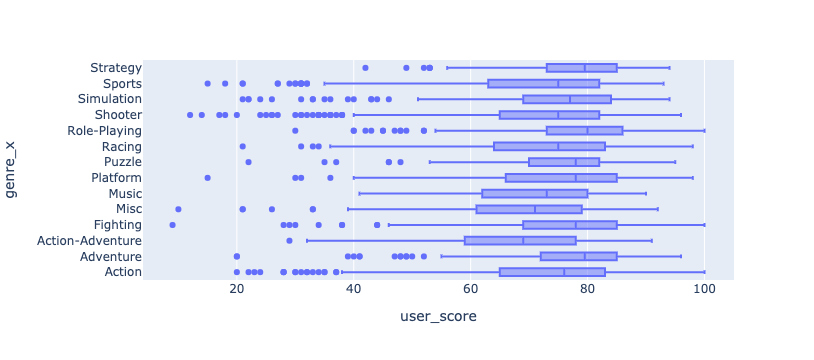

In [31]:
gen_crit = px.box(vg_df, y="genre_x", x="user_score")
gen_crit.show()

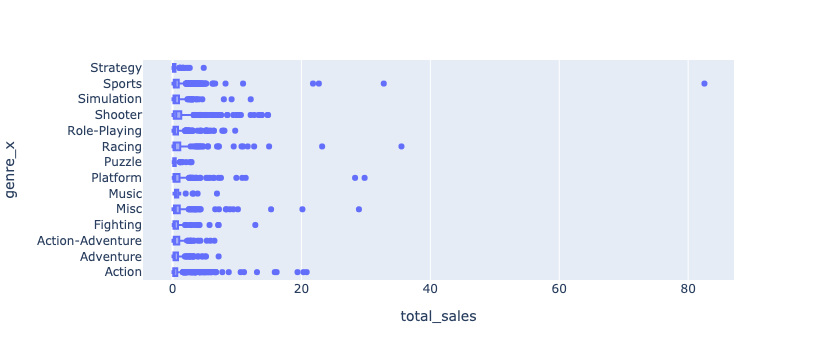

In [18]:
gen_crit = px.box(vg_df, y="genre_x", x="total_sales")
gen_crit.show()

Made this code markdown, but might return later to make it work

import pandas as pd 
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = pd.read_csv(r'Data/vg_complete_df.csv')

app = dash.Dash(__name__)

app.layout = html.Div([
    
    html.P("x-axis:"),
    html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'User Score', 'value': 'user_score'},
            {'label': 'User Count', 'value': 'user_count'},
            {'label': 'Critic Score', 'value': 'critic_score'},
            {'label': 'Critic Count', 'value': 'critic_count'},
            {'label': 'Total Sales', 'value': 'total_sales'}
            ],
        value='total_sales'
    ),
    
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=[{'value': x, 'label': x} 
                 for x in ['genre', 'company']],
        value='genre', 
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

app.run_server(debug=True)

Starting some statistical analysis here - 

qqplot_data = qqplot(gauss_data, line='s').gca().lines

fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})


py.iplot(fig, filename='normality-QQ')

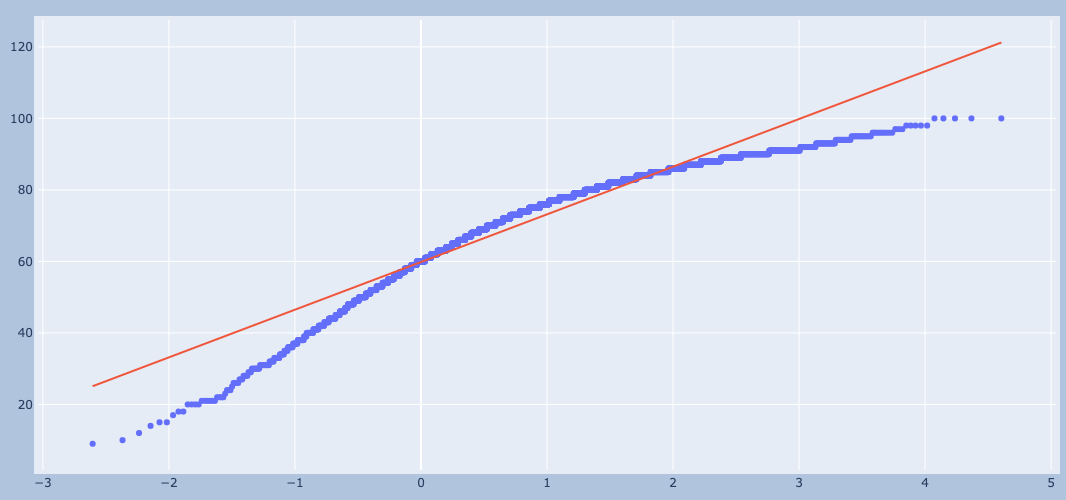

In [55]:
qq = stats.probplot(vg_df['user_score'], dist='norm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

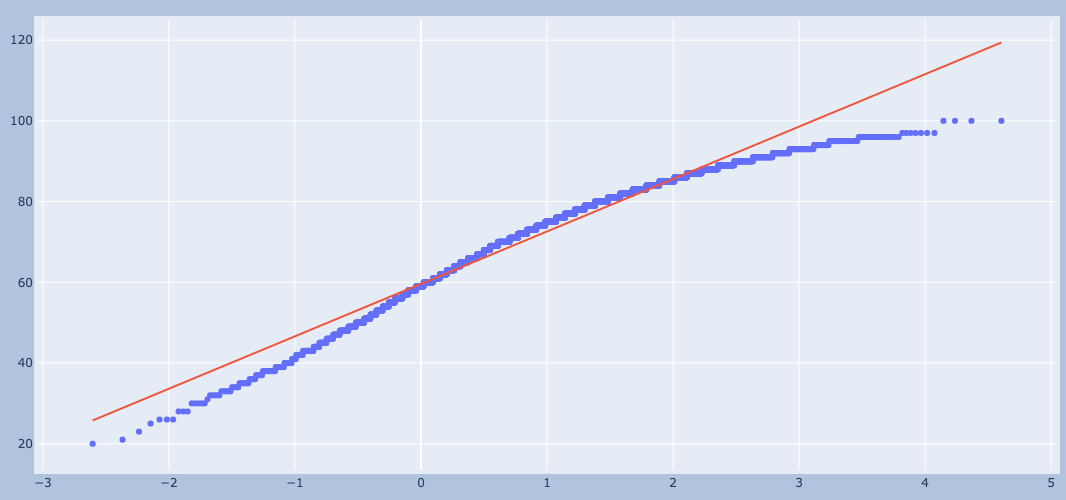

In [54]:
qq = stats.probplot(vg_df['critic_score'], dist='norm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

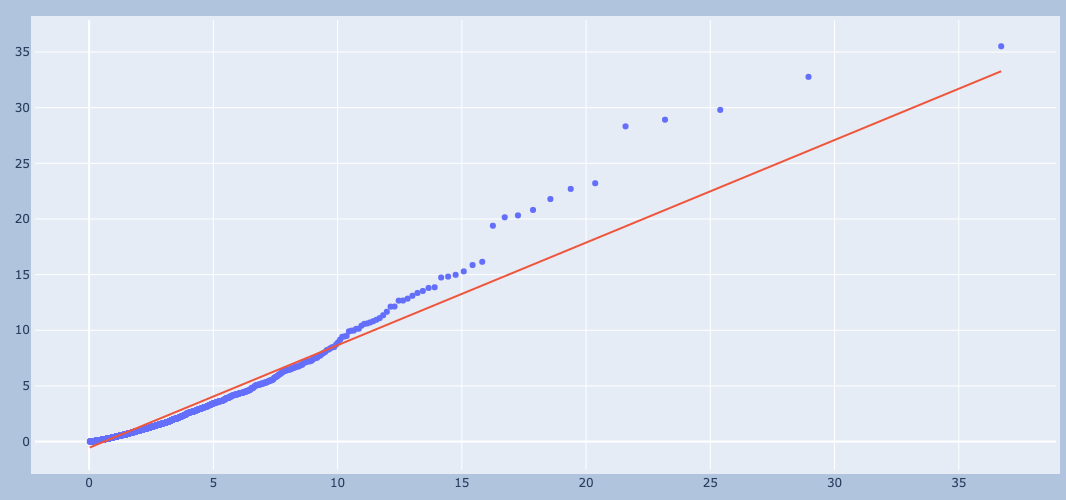

In [124]:
qq = stats.probplot(vg_df['total_sales'], dist='lognorm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [126]:
group_date = vg_df.groupby(['release_date_x'])
rls_dt_ct = group_date.agg(['count'])['title'].reset_index()

rls_dt_ct

,release_date_x,count
0,1999-01-17,1
1,1999-01-31,1
2,1999-04-30,1
3,1999-05-04,1
4,1999-05-31,1
...,...,...
1419,2016-11-01,1
1420,2016-11-04,4
1421,2016-11-08,3
1422,2016-11-15,4


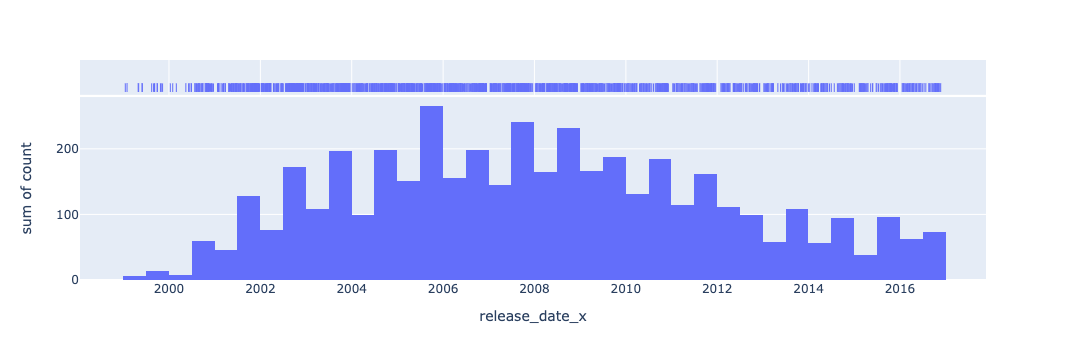

In [127]:
# x = np.random.randn(1000)
# hist_data = vg_df["release_date_x"]
# group_labels = ['distplot'] # name of the dataset

# fig = ff.create_distplot([rls_dt_ct["rls_dt_ct"]])
# fig.show()

# df = px.data.tips()
# fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug",
#                    hover_data=df.columns)
# fig.show()

fig = px.histogram(rls_dt_ct, x="release_date_x", y='count', marginal="rug")
fig.show()

In [107]:
group_date_gen = vg_df.groupby(['release_date_x', 'genre_x'])
rls_dt_genre_ct = group_date_gen.agg(['count'])['title'].reset_index()

rls_dt_genre_ct

,release_date_x,genre_x,count
0,1999-01-17,Racing,1
1,1999-01-31,Adventure,1
2,1999-04-30,Fighting,1
3,1999-05-04,Racing,1
4,1999-05-31,Platform,1
...,...,...,...
2728,2016-11-08,Action-Adventure,1
2729,2016-11-08,Adventure,1
2730,2016-11-08,Role-Playing,1
2731,2016-11-15,Action,4


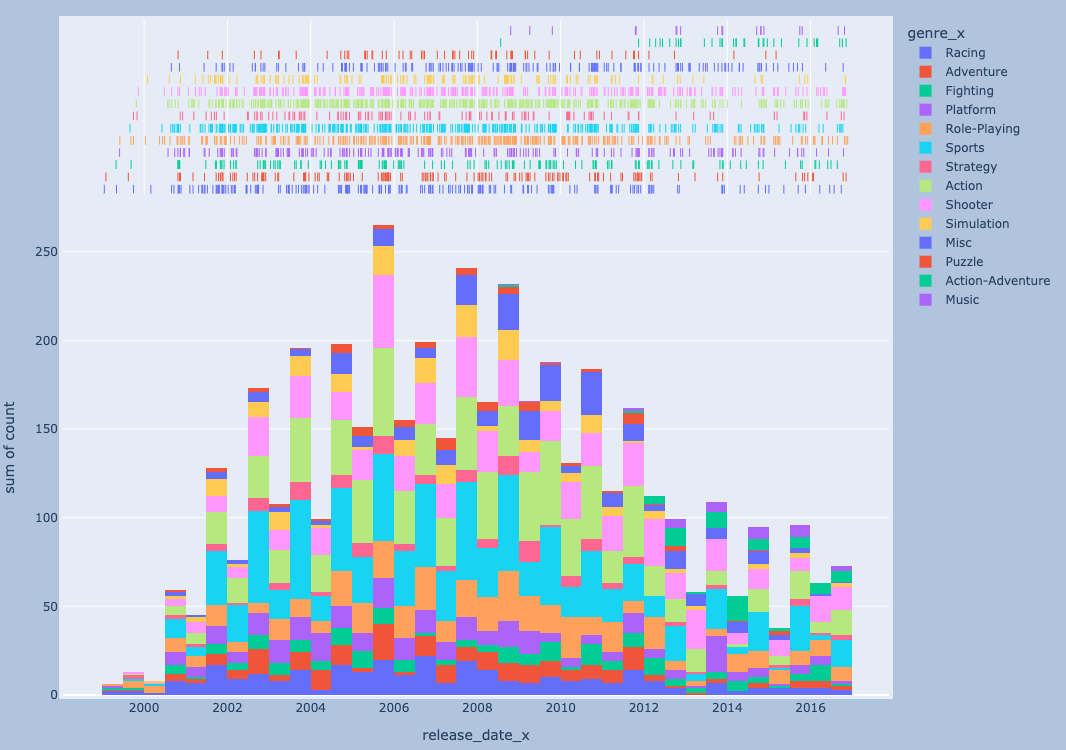

In [108]:
fig = px.histogram(rls_dt_genre_ct, x="release_date_x", y='count', color="genre_x", marginal="rug")
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [129]:
group_date_comp = vg_df.groupby(['release_date_x', 'company'])
rls_dt_comp_ct = group_date_comp.agg(['count'])['title'].reset_index()

rls_dt_comp_ct

,release_date_x,company,count
0,1999-01-17,Sony,1
1,1999-01-31,Konami,1
2,1999-04-30,Capcom,1
3,1999-05-04,Bandai Namco,1
4,1999-05-31,Sony,1
...,...,...,...
2670,2016-11-08,Bandai Namco,1
2671,2016-11-08,Sony,1
2672,2016-11-08,Ubisoft,1
2673,2016-11-15,Ubisoft,4


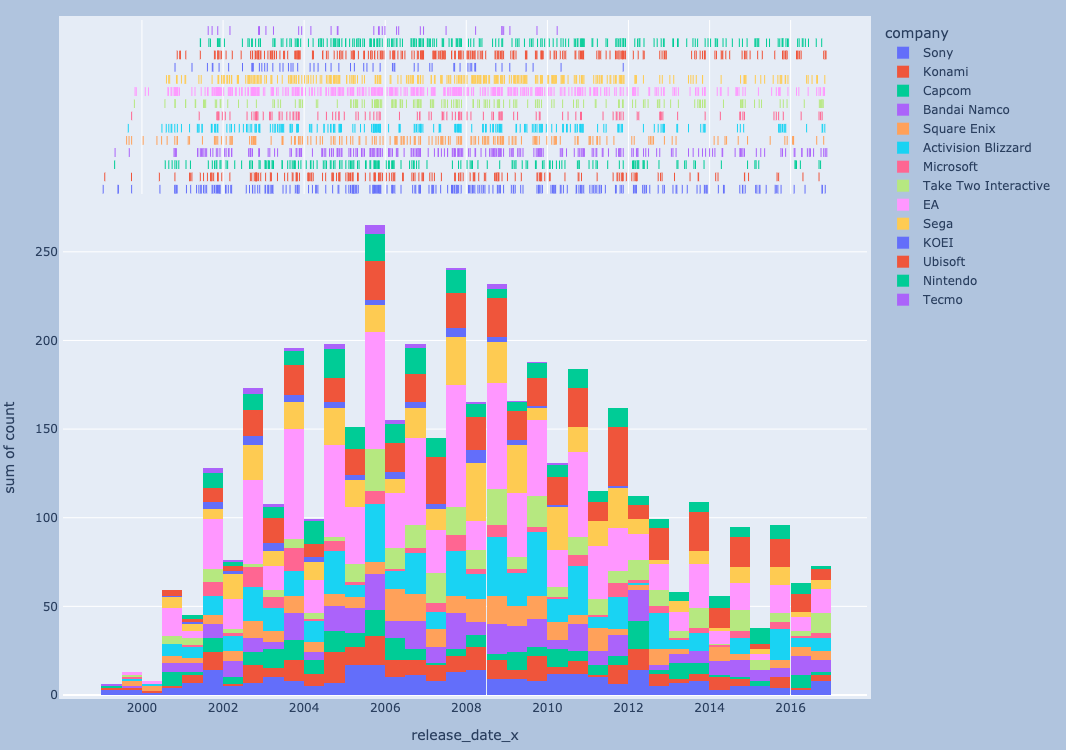

In [135]:
fig = px.histogram(rls_dt_comp_ct, x="release_date_x", y='count', color="company", marginal="rug")
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [120]:
(vg_df['total_sales'].mean()) + (vg_df['total_sales'].std()*2)

5.6704488902444625

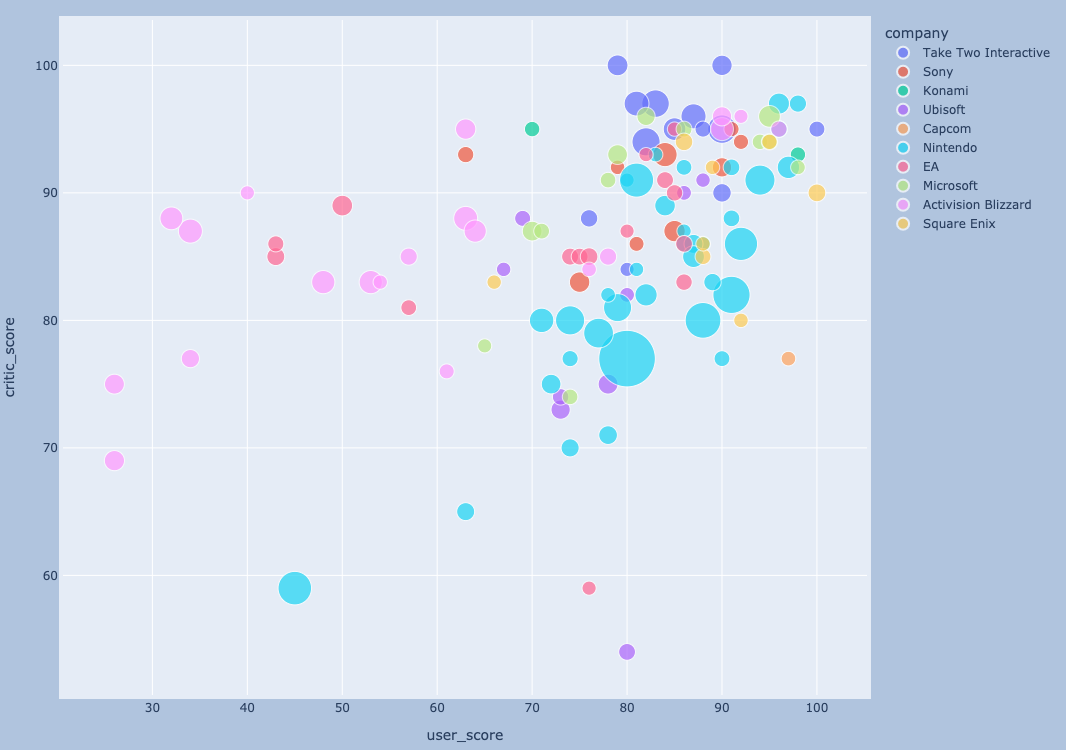

In [116]:
df = px.data.gapminder()

fig = px.scatter(vg_df.query("total_sales > 5"), x="user_score", y="critic_score",
         size="total_sales", color="company",
                 hover_name="title", log_x=False, size_max=40)
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=20,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)


fig.show()

In [59]:
vg_df.loc[vg_df['total_sales'] > 80]

,title,console,genre_x,publisher,developer_x,critic_score,total_sales,release_date_x,NA_Sales,EU_Sales,...,user_score,Title,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players,company,stock
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,94.0,20.32,2013-09-17,7.02,9.09,...,82.0,Grand Theft Auto V,RockstarNorth,Modern;Action Adventure;Modern;Open-World,PS3,97.0,83.0,Up to 16,Take Two Interactive,TTWO
2,Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,Rockstar North,95.0,20.81,2004-10-26,9.43,0.40,...,90.0,Grand Theft Auto: San Andreas,RockstarNorth,Action Adventure;Modern,PS2,95.0,90.0,1-2,Take Two Interactive,TTWO
1263,Wii Play,Wii,Misc,Nintendo,Nintendo EAD,59.0,28.92,2007-02-12,13.96,9.18,...,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,NTDOY
1264,Brain Age: Train Your Brain in Minutes a Day,DS,Misc,Nintendo,Nintendo SDD,81.0,20.15,2006-04-17,4.74,9.20,...,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,NTDOY
1544,New Super Mario Bros.,DS,Platform,Nintendo,Nintendo EAD,91.0,29.80,2006-05-15,11.28,9.14,...,81.0,New Super Mario Bros.,Nintendo,Action;Platformer;Platformer;2D;2D,DS,89.0,86.0,No Online Multiplayer,Nintendo,NTDOY
1545,New Super Mario Bros. Wii,Wii,Platform,Nintendo,Nintendo EAD,86.0,28.32,2009-11-15,14.44,6.94,...,92.0,New Super Mario Bros. Wii,Nintendo,Action;Platformer;Platformer;2D;2D,Wii,87.0,84.0,No Online Multiplayer,Nintendo,NTDOY
1912,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo EAD,82.0,35.52,2008-04-27,15.68,12.76,...,91.0,Mario Kart Wii,Nintendo,Driving;Racing;Arcade;Kart;Kart;Automobile,Wii,82.0,83.0,Up to 12,Nintendo,NTDOY
1913,Mario Kart DS,DS,Racing,Nintendo,Nintendo EAD,91.0,23.21,2005-11-14,9.71,7.47,...,94.0,Mario Kart DS,Nintendo,Driving;Racing;Arcade;Kart;Kart;Automobile,DS,91.0,86.0,4 Online,Nintendo,NTDOY
3438,Wii Sports,Wii,Sports,Nintendo,Nintendo EAD,77.0,82.53,2006-11-19,41.36,28.96,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,NTDOY
3439,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo EAD,80.0,32.77,2009-07-26,15.61,10.93,...,88.0,Wii Sports Resort,Nintendo,Sports;General;General,Wii,80.0,80.0,1-4,Nintendo,NTDOY


In [61]:
vg_df[vg_df['title'].str.contains('Grand Theft Auto V')]

,title,console,genre_x,publisher,developer_x,critic_score,total_sales,release_date_x,NA_Sales,EU_Sales,...,user_score,Title,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players,company,stock
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,94.0,20.32,2013-09-17,7.02,9.09,...,82.0,Grand Theft Auto V,RockstarNorth,Modern;Action Adventure;Modern;Open-World,PS3,97.0,83.0,Up to 16,Take Two Interactive,TTWO
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,97.0,19.39,2014-11-18,3.96,6.31,...,83.0,Grand Theft Auto V,RockstarNorth,Action Adventure;Modern;Open-World,PS4,97.0,83.0,Up to 30,Take Two Interactive,TTWO
5,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,97.0,15.86,2013-09-17,9.66,5.14,...,81.0,Grand Theft Auto V,RockstarNorth,Modern;Action Adventure;Modern;Open-World,X360,97.0,83.0,Up to 16,Take Two Interactive,TTWO
7,Grand Theft Auto V,PC,Action,Rockstar Games,Rockstar North,96.0,1.17,2015-04-14,0.39,0.69,...,79.0,Grand Theft Auto V,RockstarNorth,Modern;Action Adventure;Open-World,PC,96.0,77.0,Up to 32,Take Two Interactive,TTWO
11,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,90.0,8.72,2014-11-18,2.81,2.19,...,90.0,Grand Theft Auto V,RockstarNorth,Action Adventure;Modern;Open-World,XOne,97.0,78.0,Up to 30,Take Two Interactive,TTWO


In [ ]:
vg_df[vg_df['title']